In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv("ETHUSDT_1h.csv")
data=data[["datetime","open","high","low","Close","volume"]]
data.set_index("datetime",inplace=True)
data.index=data.index.astype("datetime64[ns]")
data

,open,high,low,Close,volume
datetime,,,,,
2018-01-01 05:30:00,733.01,734.52,720.03,727.62,2105.90100
2018-01-01 06:30:00,727.01,732.00,716.80,717.97,2305.97086
2018-01-01 07:30:00,717.67,725.75,717.59,724.05,2166.45725
2018-01-01 08:30:00,723.95,737.99,722.70,734.50,2160.90450
2018-01-01 09:30:00,734.99,744.98,730.01,744.82,2335.33705
...,...,...,...,...,...
2021-12-19 01:30:00,3943.20,3963.38,3926.50,3957.86,7323.15130
2021-12-19 02:30:00,3957.85,3977.80,3939.35,3975.75,8411.61760
2021-12-19 03:30:00,3975.76,3996.93,3964.56,3972.23,8905.38500


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34634 entries, 2018-01-01 05:30:00 to 2021-12-19 05:30:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    34634 non-null  float64
 1   high    34634 non-null  float64
 2   low     34634 non-null  float64
 3   Close   34634 non-null  float64
 4   volume  34634 non-null  float64
dtypes: float64(5)
memory usage: 1.6 MB


In [ ]:
# summary statistics descriptive statistics on this DataFrame are shown
data.describe()

,open,high,low,Close,volume
count,34634.000000,34634.000000,34634.000000,34634.000000,34634.000000
mean,908.152215,915.074542,900.594441,908.241097,24945.186752
std,1165.643919,1174.007691,1156.577174,1165.756992,29026.028252
min,82.160000,82.950000,81.790000,82.170000,0.000000
25%,185.610000,186.490000,184.550000,185.602500,8028.268030
50%,339.095000,341.375000,336.565000,339.095000,16354.586650
75%,1077.365000,1093.497500,1060.085000,1078.000000,30655.205935
max,4846.940000,4868.000000,4833.190000,4846.710000,493227.882820


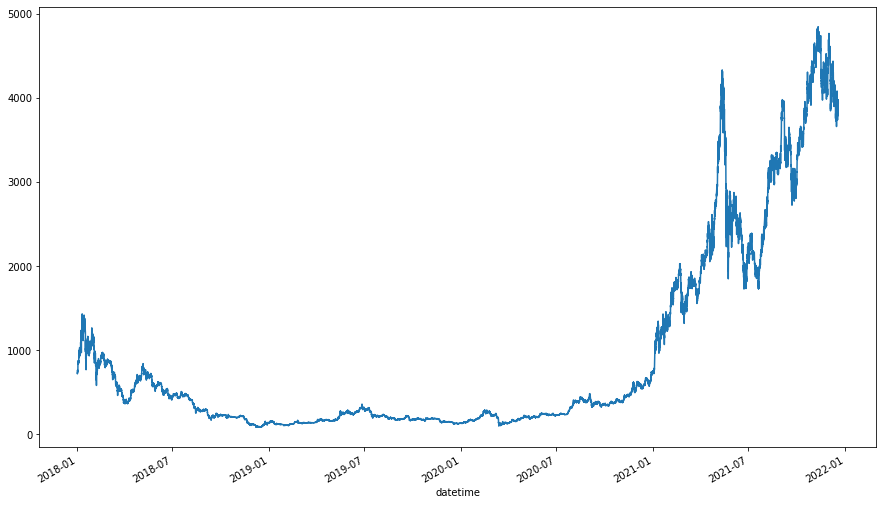

In [ ]:
data.Close.plot(figsize=(15,9));

In [ ]:
data["returns"]=np.log(data.Close/data.Close.shift(1))
data["high_low_range"]=data["high"]-data["low"]
data["range%"]=(data["high"]-data["low"])/data["low"]
data.dropna(inplace=True)
data

,open,high,low,Close,volume,returns,high_low_range,range%
datetime,,,,,,,,
2018-01-01 06:30:00,727.01,732.00,716.80,717.97,2305.97086,-0.013351,15.20,0.021205
2018-01-01 07:30:00,717.67,725.75,717.59,724.05,2166.45725,0.008433,8.16,0.011371
2018-01-01 08:30:00,723.95,737.99,722.70,734.50,2160.90450,0.014330,15.29,0.021157
2018-01-01 09:30:00,734.99,744.98,730.01,744.82,2335.33705,0.013953,14.97,0.020507
2018-01-01 10:30:00,744.78,750.00,742.08,748.99,2289.19266,0.005583,7.92,0.010673
...,...,...,...,...,...,...,...,...
2021-12-19 01:30:00,3943.20,3963.38,3926.50,3957.86,7323.15130,0.003711,36.88,0.009393
2021-12-19 02:30:00,3957.85,3977.80,3939.35,3975.75,8411.61760,0.004510,38.45,0.009760
2021-12-19 03:30:00,3975.76,3996.93,3964.56,3972.23,8905.38500,-0.000886,32.37,0.008165


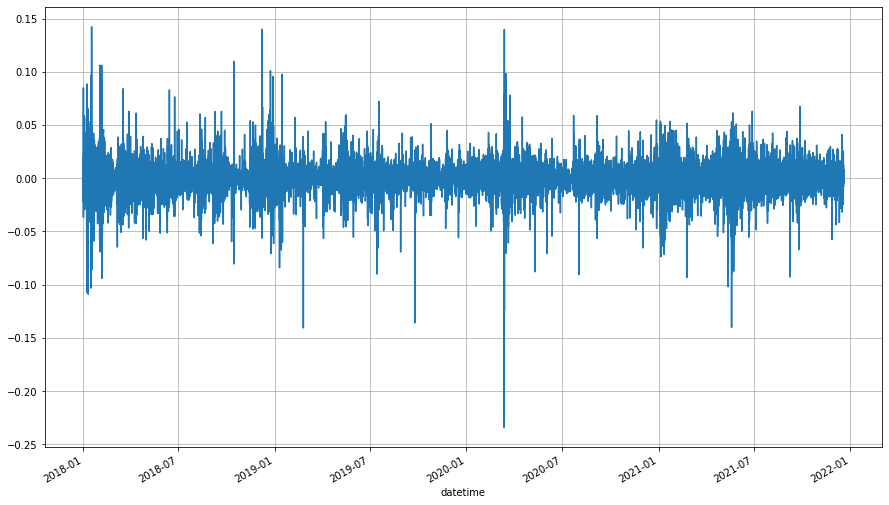

In [ ]:
data.returns.plot(figsize=(15,9),grid=True)

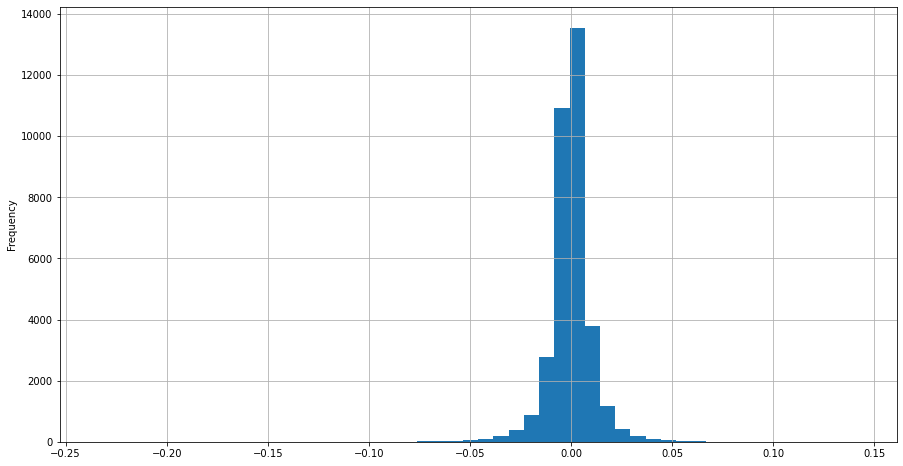

In [ ]:
data.returns.plot(kind="hist",bins=50,grid=True,figsize=(15,8))

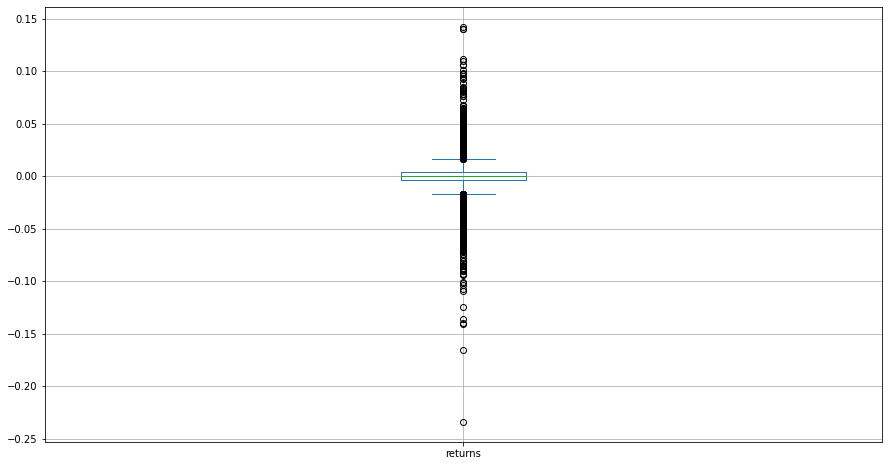

In [ ]:
# box plot, which also helps in assessing the values' distribution
data.returns.plot(kind="box",grid=True,figsize=(15,8))

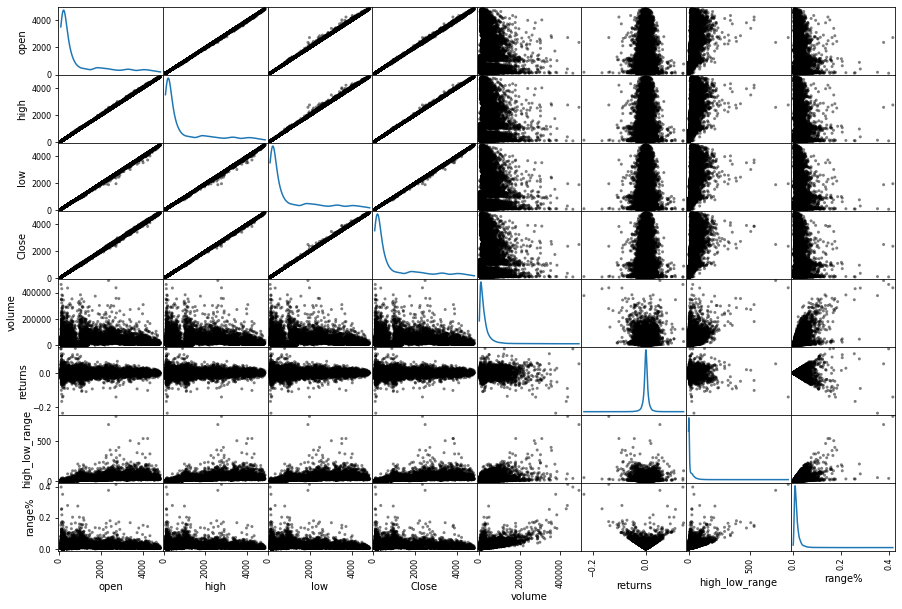

In [ ]:
# This plot indicates that there is a strong positive correlation between Delta_Close_A and Delta_Close_B and a strong negative correlation between Delta_Close_C and the other two variables.
pd.plotting.scatter_matrix(data,figsize=(15,10),color='black', alpha=0.5, diagonal='kde', grid=True);

In [ ]:
# correlation matrix
data.corr()

,open,high,low,Close,volume,returns,high_low_range,range%
open,1.000000,0.999955,0.999916,0.999906,0.113297,-0.000864,0.699733,0.079712
high,0.999955,1.000000,0.999882,0.999948,0.116023,0.003619,0.703451,0.083410
low,0.999916,0.999882,1.000000,0.999935,0.108406,0.004664,0.692462,0.072960
Close,0.999906,0.999948,0.999935,1.000000,0.112794,0.008436,0.698603,0.078779
volume,0.113297,0.116023,0.108406,0.112794,1.000000,-0.036511,0.433741,0.655595
returns,-0.000864,0.003619,0.004664,0.008436,-0.036511,1.000000,-0.045875,-0.074113
high_low_range,0.699733,0.703451,0.692462,0.698603,0.433741,-0.045875,1.000000,0.542196
range%,0.079712,0.083410,0.072960,0.078779,0.655595,-0.074113,0.542196,1.000000


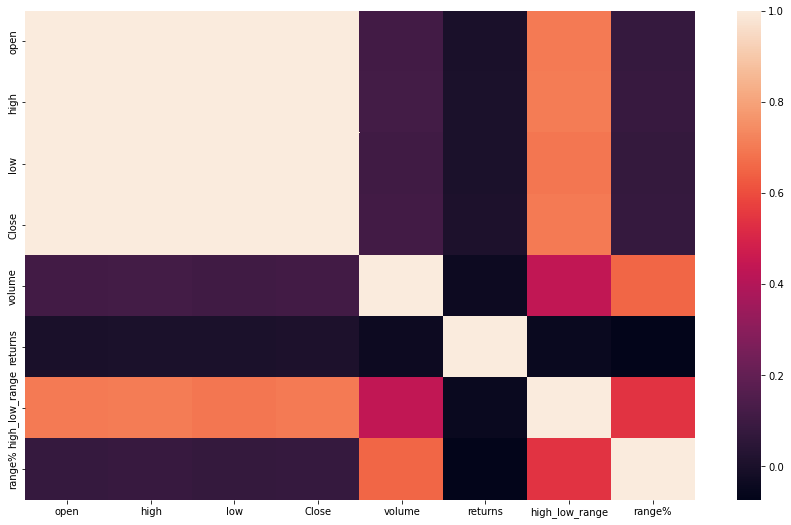

In [ ]:
# heatmap shows graphically correlation between dataframe
import seaborn as sn
plt.figure(figsize=(15,9))
sn.heatmap(data.corr());

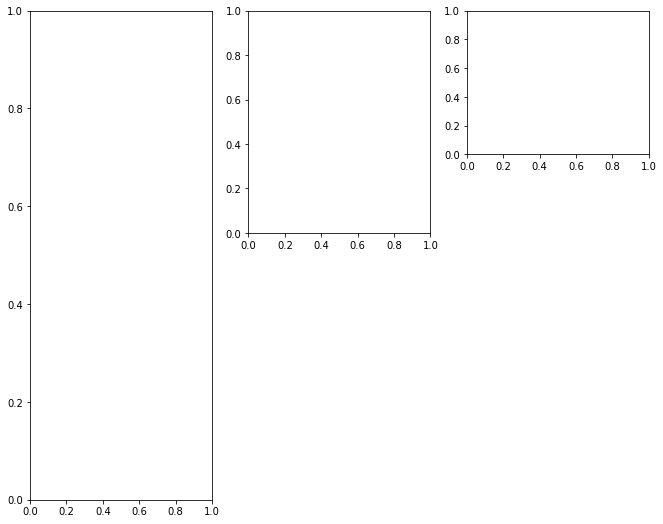

In [ ]:
fig=plt.figure(figsize=(15,9))
ax1=fig.add_subplot(1,4,1)
ax2=fig.add_subplot(2,4,2)
ax3=fig.add_subplot(3,4,3)


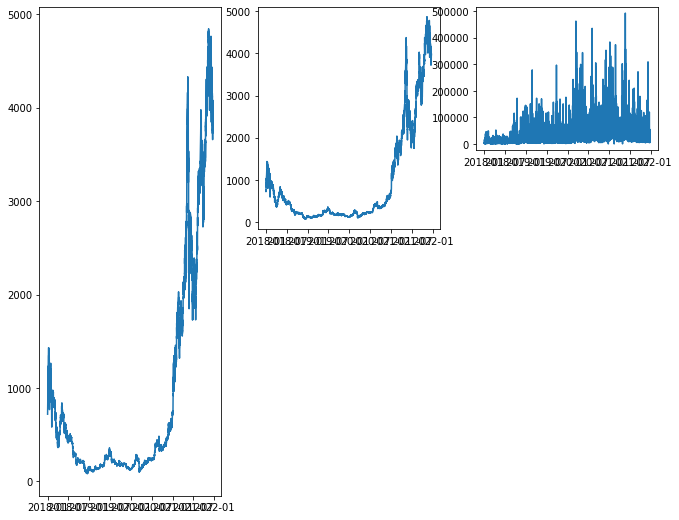

In [ ]:
ax1.plot(data["Close"])
ax2.plot(data["high"])
ax3.plot(data["volume"])
fig

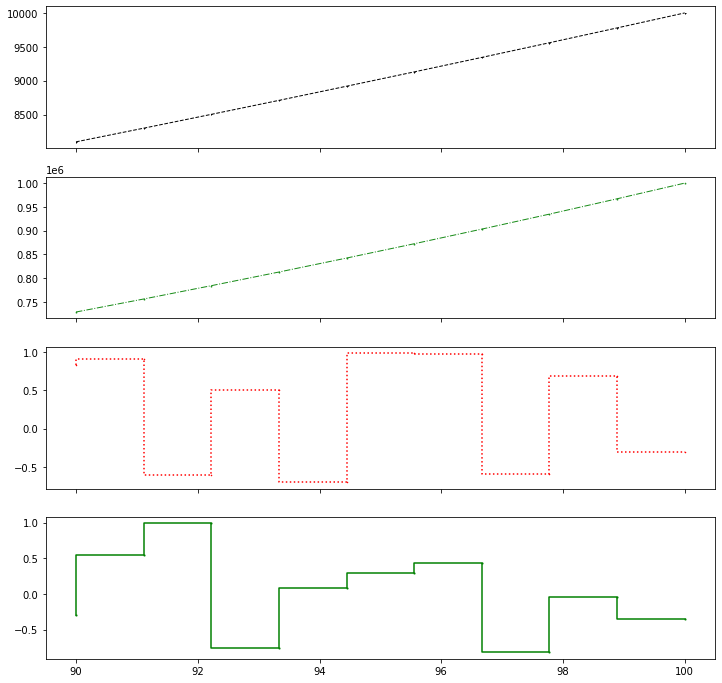

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(12, 12), sharex=True)
x = np.linspace(90,100, num=10)
y1 = x**2
y2 = x ** 3
y3 = np.sin(y1)
y4 = np.sin(y2)

ax1.plot(x, y1, color='black', linestyle='--', linewidth=1, marker='+', markersize=1)
ax2.plot(x, y2, color='green', linestyle='-.', linewidth=1, marker='^', markersize=1, alpha=0.9)
ax3.plot(x, y3, color='red', linestyle=':', marker='*', markersize=1, drawstyle='steps')
ax4.plot(x, y4, color='green', linestyle='-', marker='s', markersize=1,drawstyle='steps')

In [ ]:
df = pd.DataFrame(index=range(1000), columns=['Cont value', 'Delta1 value', 'Delta2 value', 'Cat value'])
df['Cont value'] = np.random.randn(1000).cumsum()
df['Delta1 value'] = np.random.randn(1000)
df['Delta2 value'] = np.random.randn(1000)
df['Cat value'] = np.random.permutation(['Very high', 'High', 'Medium', 'Low', 'Very Low']*200)
df['Delta1 discrete'] = pd.cut(df['Delta1 value'], labels=[-2, -1, 0, 1, 2], bins=5).astype(np.int64)
df['Delta2 discrete'] = pd.cut(df['Delta2 value'], labels=[-2, -1, 0, 1, 2], bins=5).astype(np.int64)
df

,Cont value,Delta1 value,Delta2 value,Cat value,Delta1 discrete,Delta2 discrete
0,0.089075,1.348016,-0.310421,Medium,1,0
1,-0.060915,1.102361,2.276238,Low,1,2
2,0.092953,-0.407250,-0.131225,Medium,-1,0
3,1.313371,-0.701455,-1.728971,High,-1,-2
4,1.885640,0.504642,-0.174712,Medium,0,0
...,...,...,...,...,...,...
995,-13.189407,0.986224,-0.396075,Very Low,1,0
996,-12.544661,1.584264,-0.276470,High,1,0
997,-12.083796,0.423017,0.173822,Low,0,0
998,-12.133230,-0.992664,1.543282,Medium,-1,1


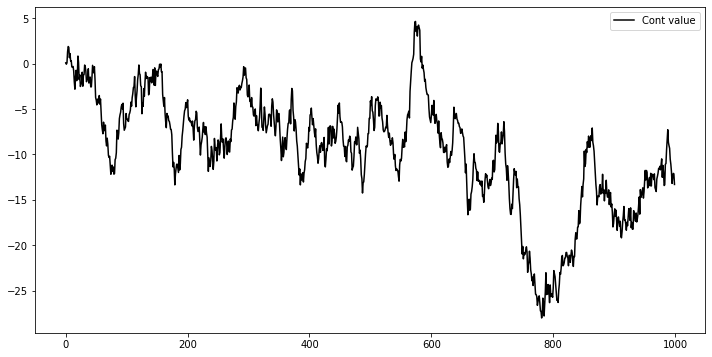

In [ ]:
df.plot(y='Cont value', kind='line', color='black', linestyle='-', figsize=(12, 6))

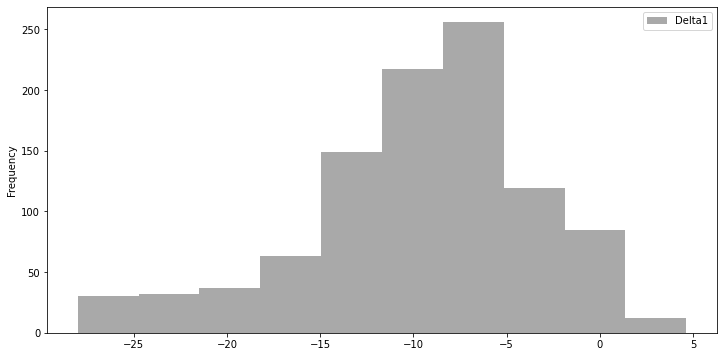

In [ ]:
df['Cont value'].plot(kind='hist', color='darkgray', figsize=(12, 6), label='Delta1')
plt.legend()

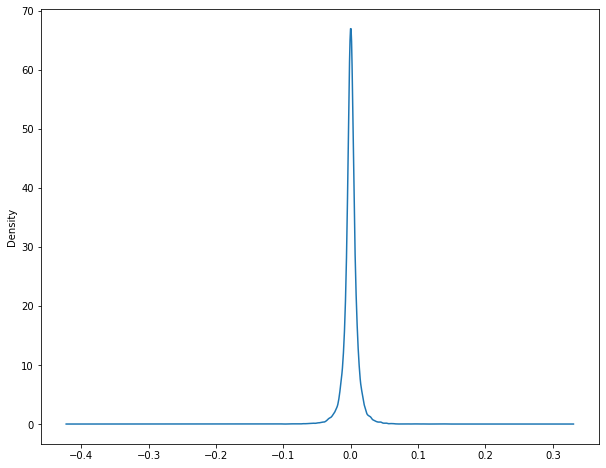

In [ ]:
data["returns"].plot(kind="kde",figsize=(10,8))

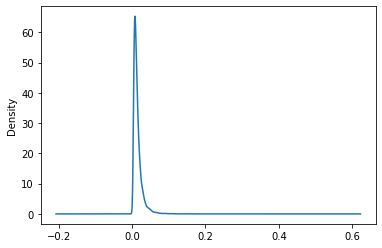

In [ ]:
data["range%"].plot(kind="kde")

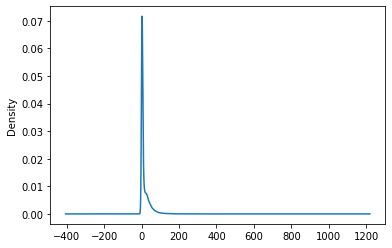

In [ ]:
data["high_low_range"].plot(kind="kde")

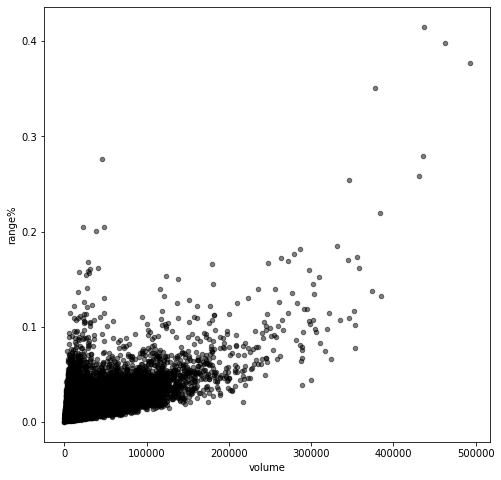

In [ ]:
data.plot(kind="scatter",x="volume",y="range%",alpha=0.5, color='black', figsize=(8, 8))

In [ ]:
dates = pd.date_range('1992-01-01', '2022-12-31')
time_series = pd.DataFrame(index=dates, columns=['A', 'B'])
time_series['A'] = np.random.randint(low=-100, high=101, size=len(dates)).cumsum() + 5000
time_series['B'] = np.random.randint(low=-75, high=76, size=len(dates)).cumsum() + 5000
time_series

,A,B
1992-01-01,4991,4993
1992-01-02,5012,5057
1992-01-03,5056,5075
1992-01-04,5108,5014
1992-01-05,5092,5063
...,...,...
2022-12-27,4170,5904
2022-12-28,4245,5967
2022-12-29,4212,5905
2022-12-30,4231,5857


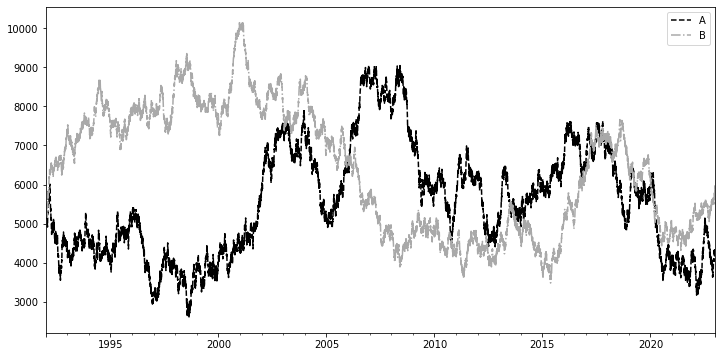

In [ ]:
time_series['A'].plot(kind='line', linestyle='--', color='black', figsize=(12, 6), label='A')
time_series['B'].plot(kind='line', linestyle='-.', color='darkgray', figsize=(12, 6), label='B')
plt.legend()

In [ ]:
time_series['A_1_delta'] = time_series['A'].shift(-1) - time_series['A'].fillna(0)
time_series['B_1_delta'] = time_series['B'].shift(-1) - time_series['B'].fillna(0)

time_series['A_5_delta'] = time_series['A'].shift(-5) - time_series['A'].fillna(0)
time_series['B_5_delta'] = time_series['B'].shift(-5) - time_series['B'].fillna(0)

time_series['A_20_delta'] = time_series['A'].shift(-20) - time_series['A'].fillna(0)
time_series['B_20_delta'] = time_series['B'].shift(-20) - time_series['B'].fillna(0)
time_series_deltas = time_series[['A_1_delta', 'B_1_delta', 'A_5_delta', 'B_5_delta', 'A_20_delta', 'B_20_delta']].dropna()
time_series_deltas

,A_1_delta,B_1_delta,A_5_delta,B_5_delta,A_20_delta,B_20_delta
1992-01-01,21.0,64.0,115.0,103.0,196.0,433.0
1992-01-02,44.0,18.0,122.0,27.0,167.0,341.0
1992-01-03,52.0,-61.0,149.0,69.0,135.0,266.0
1992-01-04,-16.0,49.0,157.0,197.0,-14.0,261.0
1992-01-05,14.0,33.0,166.0,168.0,-53.0,160.0
...,...,...,...,...,...,...
2022-12-07,9.0,23.0,97.0,39.0,60.0,389.0
2022-12-08,-87.0,-39.0,91.0,55.0,126.0,429.0
2022-12-09,48.0,65.0,195.0,114.0,180.0,406.0
2022-12-10,89.0,-42.0,188.0,106.0,151.0,293.0


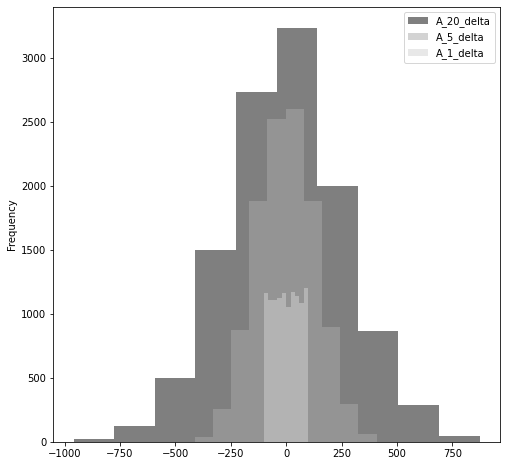

In [ ]:
time_series_deltas['A_20_delta'].plot(kind='hist', color='black', alpha=0.5, label='A_20_delta', figsize=(8,8))
time_series_deltas['A_5_delta'].plot(kind='hist', color='darkgray', alpha=0.5, label='A_5_delta', figsize=(8,8))
time_series_deltas['A_1_delta'].plot(kind='hist', color='lightgray', alpha=0.5, label='A_1_delta', figsize=(8,8))
plt.legend()

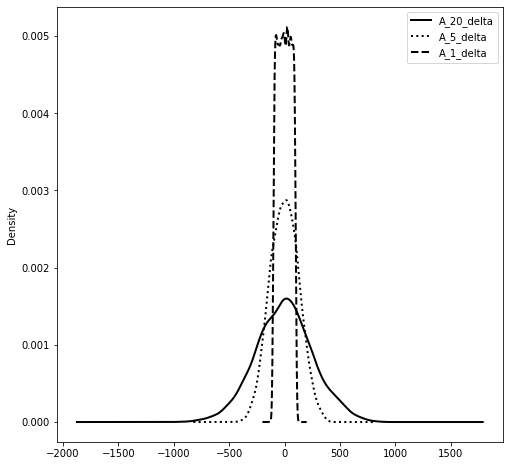

In [ ]:
time_series_deltas['A_20_delta'].plot(kind='kde', linestyle='-', linewidth=2, color='black', label='A_20_delta', figsize=(8,8))
time_series_deltas['A_5_delta'].plot(kind='kde', linestyle=':', linewidth=2, color='black', label='A_5_delta', figsize=(8,8))
time_series_deltas['A_1_delta'].plot(kind='kde', linestyle='--', linewidth=2, color='black', label='A_1_delta', figsize=(8,8))
plt.legend()

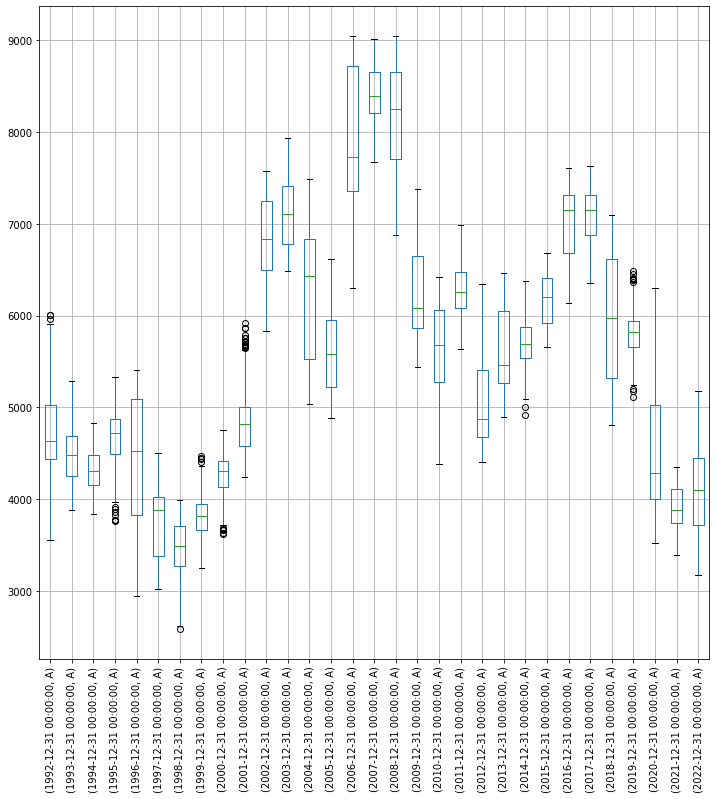

In [ ]:
group_A = time_series[['A']].groupby(pd.Grouper(freq='A'))
group_A.boxplot(subplots=False, rot=90, figsize=(12,12))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f91a38a73d0>,
      dtype=object)

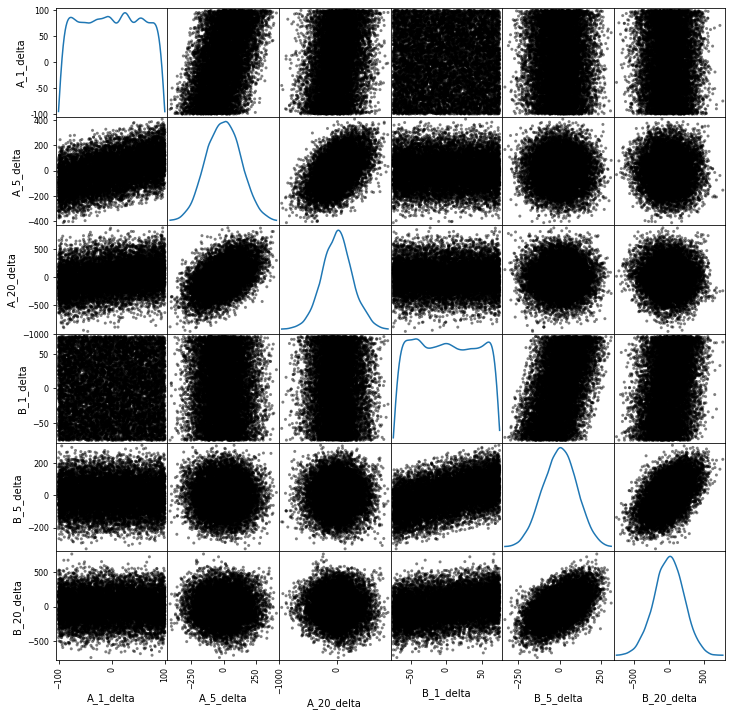

In [ ]:
pd.plotting.scatter_matrix(time_series[['A_1_delta', 'A_5_delta', 'A_20_delta', 'B_1_delta', 'B_5_delta', 'B_20_delta']], diagonal='kde', color='black', figsize=(12, 12))


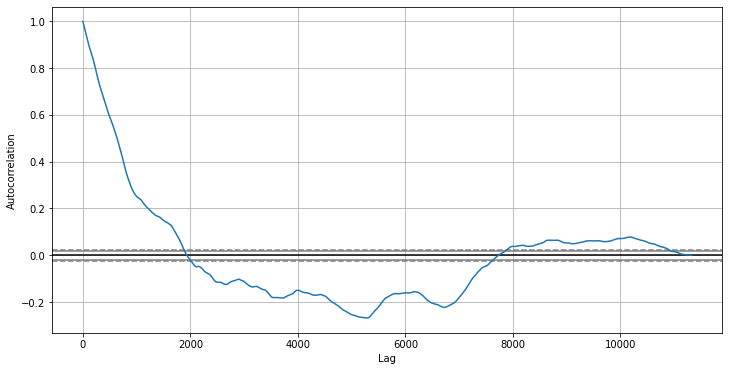

In [ ]:
fig, ax = plt.subplots(1, figsize=(12, 6))
pd.plotting.autocorrelation_plot(time_series['A'], ax=ax)

In [ ]:
from statsmodels.graphics.api import qqplot

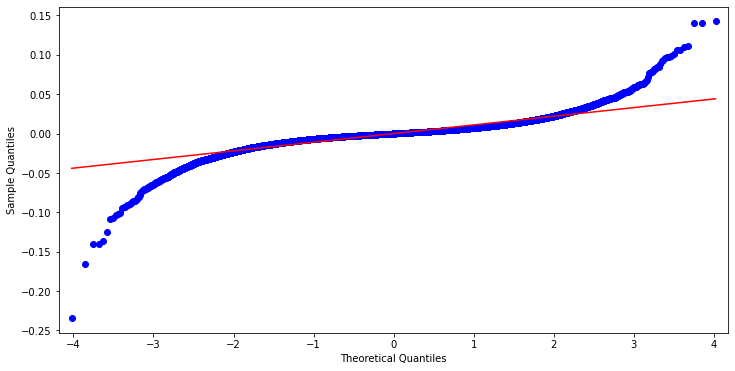

In [ ]:
fig = qqplot(data["returns"],line='s')
fig.set_size_inches(12, 6)

In [ ]:
# Time series modeling with statsmodels
# Error, Trend, Seasonality (ETS) analysis of a time series.
n= 12*20
trend= np.linspace(100,200,num=n)
seasonality = np.sin(trend)*10
error=np.random.randint(40,60,size=n)
dataset=trend+seasonality+error

In [ ]:
df=pd.DataFrame(dataset)
df

,0
0,138.936344
1,141.295236
2,144.847908
3,152.881083
4,160.771114
...,...
235,239.376775
236,244.403143
237,244.696145
238,230.622474


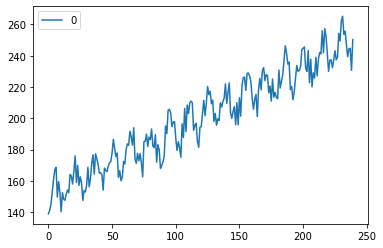

In [ ]:
df.plot()

In [ ]:
# The Hodrick-Prescott (HP) filter is used to separate the trend and cyclical components from time series data 
#by removing short-term fluctuations from the longer-term trend.
import statsmodels.api as sm
hp_cycle, hp_trend = sm.tsa.filters.hpfilter(data.Close, lamb=129600)
decomp = data[["Close"]]
decomp['HP_Cycle'] = hp_cycle
decomp['HP_Trend'] = hp_trend
decomp

,Close,HP_Cycle,HP_Trend
datetime,,,
2018-01-01 06:30:00,717.97,-8.319002,726.289002
2018-01-01 07:30:00,724.05,-5.284988,729.334988
2018-01-01 08:30:00,734.50,2.119091,732.380909
2018-01-01 09:30:00,744.82,9.393338,735.426662
2018-01-01 10:30:00,748.99,10.517844,738.472156
...,...,...,...
2021-12-19 01:30:00,3957.86,34.573896,3923.286104
2021-12-19 02:30:00,3975.75,52.310942,3923.439058
2021-12-19 03:30:00,3972.23,48.636637,3923.593363


In [ ]:
uc = sm.tsa.UnobservedComponents(data['Close'], level='lltrend', cycle=True, stochastic_cycle=True)
res_uc = uc.fit(method='powell', disp=True)
res_uc.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Optimization terminated successfully.
         Current function value: 4.192951
         Iterations: 6
         Function evaluations: 392


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Unobserved Components Results                         
==============================================================================
Dep. Variable:                  Close   No. Observations:                34633
Model:             local linear trend   Log Likelihood             -145214.478
                   + stochastic cycle   AIC                         290438.955
Date:                Wed, 23 Mar 2022   BIC                         290481.217
Time:                        11:15:25   HQIC                        290452.424
Sample:                             0                                         
                              - 34633                                         
Covariance Type:                  opg                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular    18.0758      0.426     42.445      0.000      17.241      18.910
sigma2.level       136.8058      0.408    335.277      0.000     136.006     137.606
sigma2.trend      2.551e-06    2.7e-06      0.946      0.344   -2.73e-06    7.83e-06
sigma2.cycle        88.0499      0.408    215.789      0.000      87.250      88.850
frequency.cycle   9.092e-18   1.15e-11   7.92e-07      1.000   -2.25e-11    2.25e-11
===================================================================================
Ljung-Box (Q):                      822.13   Jarque-Bera (JB):           3580347.51
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              10.81   Skew:                            -1.66
Prob(H) (two-sided):                  0.00   Kurtosis:                        52.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.17e+37. Standard errors may be unstable.
"""

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(data['Close'])
print('Test Stat: {}\np value: {}\nLags: {}\nNum observations: {}'.format(result[0], result[1], result[2], result[3]))

Test Stat: 0.3308622984770581
p value: 0.9787169580256756
Lags: 49
Num observations: 34583


In [ ]:
price_diff = (data['Close'].shift(-1) - data['Close']).fillna(0)
price_diff

datetime
2018-01-01 06:30:00     6.08
2018-01-01 07:30:00    10.45
2018-01-01 08:30:00    10.32
2018-01-01 09:30:00     4.17
2018-01-01 10:30:00    13.19
                       ...  
2021-12-19 01:30:00    17.89
2021-12-19 02:30:00    -3.52
2021-12-19 03:30:00   -12.30
2021-12-19 04:30:00   -18.02
2021-12-19 05:30:00     0.00
Name: Close, Length: 34633, dtype: float64

In [ ]:
result = adfuller(price_diff)
print('Test Stat: {}\np value: {}\nLags: {}\nNum observations: {}'.format(result[0], result[1], result[2], result[3]))

Test Stat: -27.185562258618404
p value: 0.0
Lags: 48
Num observations: 34584


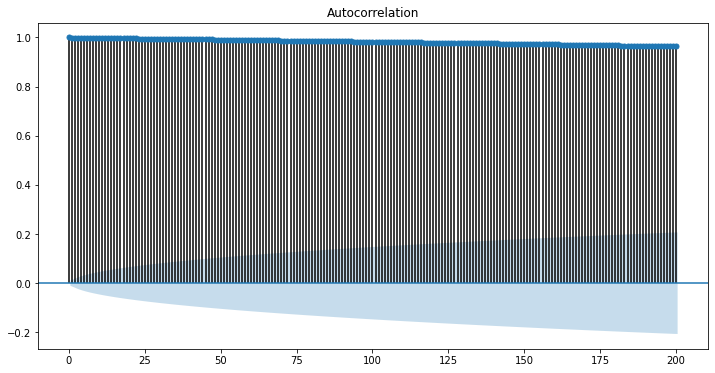

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig = plot_acf(data['Close'], lags=200)
fig.set_size_inches(12, 6)

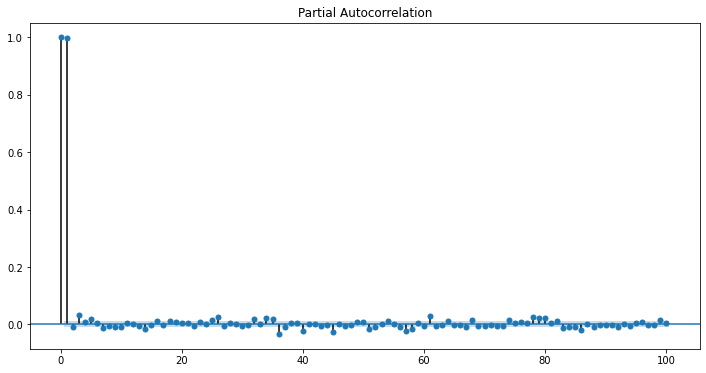

In [ ]:
fig = plot_pacf(data['Close'], lags=100)
fig.set_size_inches(12, 6)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
arima = ARIMA(data['Close'], order=(36,1,2))
res_ar = arima.fit()
res_ar.summary()

ModuleNotFoundError: ignored